# Class function for Simple Impute, 

In [21]:
#from my_class_univariate import myunivariate
import pandas as pd
import numpy as np
from my_class_univariate import myunivariate
dataset = pd.read_csv("Placement.csv")

#split cat_cals, num_cals
cat_cals, num_cals= myunivariate.df_cat_num_split(dataset)
print(num_cals)

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [22]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [23]:
#Impute missing values using simple imputer 
dataset[num_cals]=myunivariate.df_simple_impute(dataset[num_cals], strategy="mean")
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [24]:
#Outlier info & Univariate Table info
myunivariate.UnivariateTable(dataset,num_cals)


-------------- Outlier info --------------

Lower outlier in :'hsc_p' value : 37.0
Upper outlier in :'hsc_p' value : 97.7
Upper outlier in :'degree_p' value : 91.0
Upper outlier in :'salary' value : 940000.0
Lesser outlier : ['hsc_p'] 
Greater outlier: ['hsc_p', 'degree_p', 'salary']

-------------- Univariate Table  --------------



,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.3,66.33,66.37,72.1,62.28,288655.41
Median,108.0,67.0,65.0,66.0,71.0,62.0,288655.405405
Mode,1.0,62.0,63.0,65.0,60.0,56.7,288655.41
Min,1.0,40.89,37.0,50.0,50.0,51.21,200000.0
Q1-25%,54.5,60.6,60.9,61.0,60.0,57.945,250000.0
Q2-50%,108.0,67.0,65.0,66.0,71.0,62.0,288655.405405
Q3-75%,161.5,75.7,73.0,72.0,83.5,66.255,288655.405405
Max,215.0,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,38655.405405
1.5-Rule,160.5,22.65,18.15,16.5,35.25,12.465,57983.108108


In [25]:
# Function to replace outliers using np.percentile
dataset[num_cals]=myunivariate.replace_outliers(dataset[num_cals])


-------------- Outliers Replaced info --------------

sl_no: Outliers replaced → lower < -106.00, upper > 322.00
ssc_p: Outliers replaced → lower < 37.95, upper > 98.35
hsc_p: Outliers replaced → lower < 42.75, upper > 91.15
degree_p: Outliers replaced → lower < 44.50, upper > 88.50
etest_p: Outliers replaced → lower < 24.75, upper > 118.75
mba_p: Outliers replaced → lower < 45.48, upper > 78.72
salary: Outliers replaced → lower < 192016.89, upper > 346638.51


In [26]:
#Outlier info & Univariate Table info
myunivariate.UnivariateTable(dataset,num_cals)


-------------- Outlier info --------------

Lesser outlier : [] 
Greater outlier: []

-------------- Univariate Table  --------------



,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.3,66.33,66.36,72.1,62.28,277478.49
Median,108.0,67.0,65.0,66.0,71.0,62.0,288655.405405
Mode,1.0,62.0,63.0,65.0,60.0,56.7,288655.41
Min,1.0,40.89,42.75,50.0,50.0,51.21,200000.0
Q1-25%,54.5,60.6,60.9,61.0,60.0,57.945,250000.0
Q2-50%,108.0,67.0,65.0,66.0,71.0,62.0,288655.405405
Q3-75%,161.5,75.7,73.0,72.0,83.5,66.255,288655.405405
Max,215.0,89.4,91.15,88.5,98.0,77.89,346638.513514
IQR,107.0,15.1,12.1,11.0,23.5,8.31,38655.405405
1.5-Rule,160.5,22.65,18.15,16.5,35.25,12.465,57983.108108


In [32]:
#imputed dataset saved
dataset.to_csv("placement_imputed.csv",index=False)
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,346638.513514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,346638.513514
211,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [34]:
import seaborn as sns

C:\Users\15016\AppData\Local\Temp\ipykernel_48592\4012007539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ssc_p'])


<Axes: xlabel='ssc_p', ylabel='Density'>

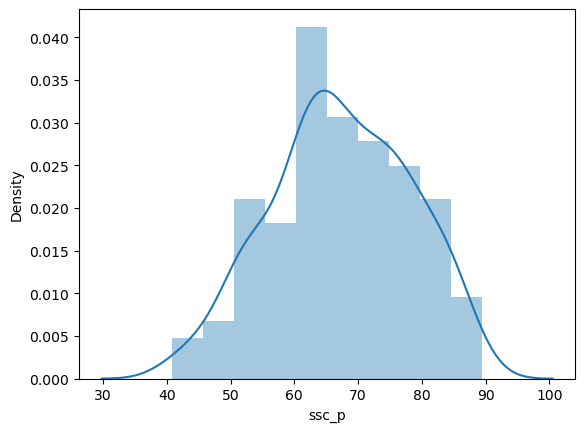

In [42]:
# d
sns.distplot(dataset['ssc_p'])

ValueError: x and y must have same first dimension, but have shapes (1000,) and (215,)

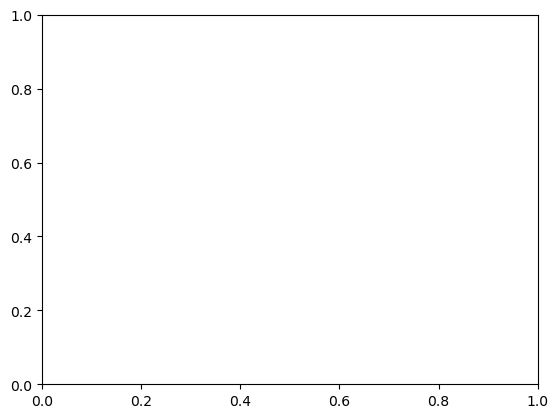

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for Normal distribution
mu, sigma = 0, 1   # mean=0, std=1

# X range
#x = np.linspace(-4, 4, 1000)

# Probability Density Function
pdf = norm.pdf(dataset['ssc_p'], mu, sigma)

plt.plot(x, pdf, label="Normal PDF")
plt.title("Normal Distribution PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

Mean=67.303, Standard Deviation=10.827
The probability between range(40,50): 4.92 %


C:\Users\15016\AppData\Local\Temp\ipykernel_48592\977107793.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df,kde=True,kde_kws={'color':'blue'},color='green')


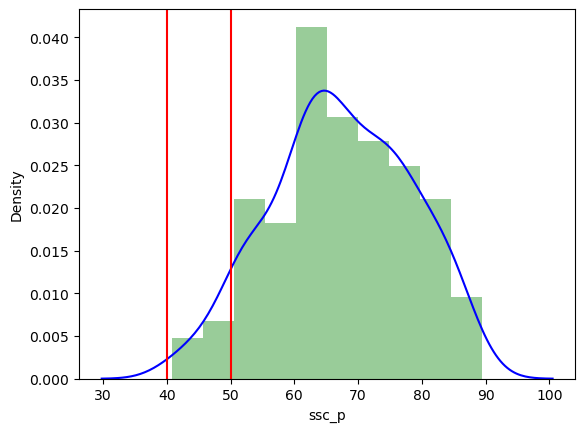

np.float64(0.04916705533695259)

In [68]:
def get_pdf_probability(df, startrange, endrange):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import norm

    # Plot histogram + KDE
    ax = sns.distplot(df,kde=True,kde_kws={'color':'blue'},color='green')
    plt.axvline(startrange, color='red')
    plt.axvline(endrange, color='red')

    # Calculate parameters
    sample_mean = df.mean()
    sample_std = df.std()
    print(f"Mean={sample_mean:.3f}, Standard Deviation={sample_std:.3f}")

    # Define normal distribution with estimated mean & std
    dist = norm(loc=sample_mean, scale=sample_std)

    # Probability between range using CDF
    prob = dist.cdf(endrange) - dist.cdf(startrange)
    print(f"The probability between range({startrange},{endrange}): {(prob*100):.2f} %")

    plt.show()
    return prob

get_pdf_probability(dataset['ssc_p'], 40, 50)